# Describing the data

In this notebook, we quickly describe the data of the experimental results.
This data is extracted from an sqlite database much more data is contained but it is somehow messy because it evolved with the project.

## Instances

The full instances can be found in the sqlite database.
Here we only save some general information.

* The graph id which can also be used to get the actual instance from the database
* The number of vertices in the instance
* The number of edges in the instance
* The type of the instance (random or celestial)

In [36]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import math

In [37]:
sns.set_theme() # we use seaborn for beautiful and simple plots

In [38]:
instances = pd.read_json("./data/instances.json")
instances.sample(5)

,graph_id,vertices_amount,edges_amount,instance_type,instance
1325,1326,26,243,random,See sqllite database using graph_id
1378,1379,43,357,random,See sqllite database using graph_id
757,758,24,111,celestial,See sqllite database using graph_id
957,958,29,125,celestial,See sqllite database using graph_id
653,654,22,164,celestial,See sqllite database using graph_id


## Solutions

The full solutions can again be found in the sqlite database using the solution id.
Here we only state the important information about it.

* The graph id which denotes for which instance this is a solution
* The solution id which can be used to retrieve the actual solution from the database
* The objective values for MS, TE, and BE.
* The general technique of the solver
* The concrete solver (including the objective)
* The solution type (the objective it has been optimized for)
* The date the solution has been computed
* The runtime it took to compute it
* If it has an optimality certificate (only possible for MIPs or CPs)

The data has already been cleared of duplicates. For every solver and instance, only the last entry is available.

In [39]:
solutions = pd.read_json("./data/solutions.json")
solutions.sample(10)

,graph_id,solution_id,MS,TE,BE,solver_type,solver,solution_type,date,runtime,has_optimality_certificate,solution
8815,406,4575,694.882712,6200.025839,522.129183,Greedy,Greedy (MS),MS,2020-08-13 12:34:18.109511,0.440028,False,See sqlite database using solution_id
8717,400,34670,880.403810,2901.176453,299.386772,GA,GA (BE),BE,2020-08-13 12:34:32.993169,27.360353,False,See sqlite database using solution_id
15191,741,24852,1313.945541,14658.008611,954.041979,APX,APX (TE),TE,2020-08-13 12:34:45.926087,1.086622,False,See sqlite database using solution_id
4781,193,25104,723.374609,1473.163746,169.819062,GA,GA (TE),TE,2020-08-13 12:34:45.926394,6.668778,False,See sqlite database using solution_id
3807,147,3036,310.654902,936.533333,180.026176,MIP-1,MIP-1 (MS),MS,2020-08-11 10:09:37.223461,0.539210,True,See sqlite database using solution_id
31195,1670,40808,490.642314,824.235789,240.627297,CP-2,CP-2 (TE),TE,2021-01-08 17:56:30.870197,1.389590,True,See sqlite database using solution_id
20104,989,17980,1613.132621,2394.302698,357.646443,CP-2,CP-2 (TE),TE,2020-08-25 10:25:54.207986,900.035354,False,See sqlite database using solution_id
22979,1127,27786,787.999030,10429.330457,699.639034,ILS,ILS (MS),MS,2020-12-21 15:10:03.797201,668.466902,False,See sqlite database using solution_id
8374,382,33852,532.605212,4756.136474,455.963446,GA,GA (MS),MS,2020-08-13 12:34:18.111162,18.532334,False,See sqlite database using solution_id
27228,1393,32518,1340.097508,18115.354033,848.253426,ILS,ILS (BE),BE,2021-01-02 18:23:50.601154,0.664974,False,See sqlite database using solution_id


# Getting a quick overview of the instance distribution

It is always good to know, how the instances are distributed.
For this, we filter the instance for those that are actually solved.

In [40]:
must_have_solvers = ["CP-1 (MS)"]#, "GA (TE)"]
solvers_for_graph_id = solutions.groupby(["graph_id"])["solver"].unique()
def are_superset(s):
    return set(must_have_solvers).issubset(set(s))
graph_ids_to_consider = list(solvers_for_graph_id[solvers_for_graph_id.apply(are_superset)].index)

In [41]:
results = solutions.merge(instances, left_on="graph_id", right_on="graph_id")[["graph_id", "instance_type", "MS", "TE", "BE", "edges_amount", "vertices_amount"]]
results = results[results["graph_id"].isin(graph_ids_to_consider)]
results = results.groupby(["graph_id"]).min()
results

,instance_type,MS,TE,BE,edges_amount,vertices_amount
graph_id,,,,,,
1,celestial,273.032986,768.463967,164.595938,15,6
2,celestial,233.228700,821.139560,164.688861,15,6
3,celestial,256.079902,793.359902,152.924449,15,6
4,celestial,273.733500,675.098767,171.931792,14,6
5,celestial,250.127735,787.109527,171.124965,15,6
...,...,...,...,...,...,...
2124,celestial,760.102972,28606.724282,704.548087,626,58
2125,celestial,754.680019,28975.442156,750.039254,658,58
2132,celestial,797.738643,31947.201478,738.606651,764,61


In [42]:
important_instances = instances[instances["graph_id"].isin(set(results.index))]

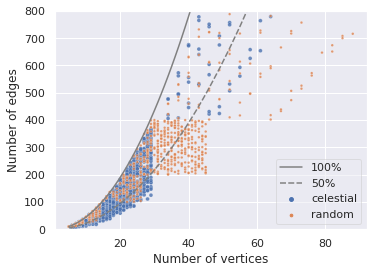

In [46]:
import networkx as nx
plt.figure(figsize=(5,3.6))
plt.title("Instance distribution")

t = important_instances.copy()
t.rename(inplace=True, columns={"instance_type": "Type"})
t.sort_values(["Type"], inplace=True)
sns.scatterplot(data=t, y="edges_amount", x="vertices_amount", hue="Type", size="Type", alpha=0.8, sizes=[15, 7])

ns = list(t["vertices_amount"].unique())
ns.sort()
ns = pd.DataFrame(index=ns, data={"100%": [nx.complete_graph(n).number_of_edges() for n in ns], "50%": [0.5*nx.complete_graph(n).number_of_edges() for n in ns]})
sns.lineplot(data=ns, palette=["grey", "grey"])
plt.xlabel("Number of vertices")
plt.ylabel("Number of edges")
plt.title("")
plt.ylim(0, 800)
plt.legend(loc='lower right', framealpha=0.5)
plt.tight_layout(pad=0.01)
#plt.tight_layout()
plt.savefig("./output/plot_instance_distribution.pdf")
plt.savefig("./output/plot_instance_distribution.png", dpi=300)
plt.show()